In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [20]:
# Load the dataset
file_path = '/content/heart_disease.xlsx'
df = pd.read_excel(file_path)

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [22]:
# Check for missing values
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [23]:
print(df.describe())

              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [24]:
# Handle missing values in 'oldpeak' by filling with the median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

<ipython-input-24-d4abe7691771>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


In [25]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Boxplot of Resting Blood Pressure')

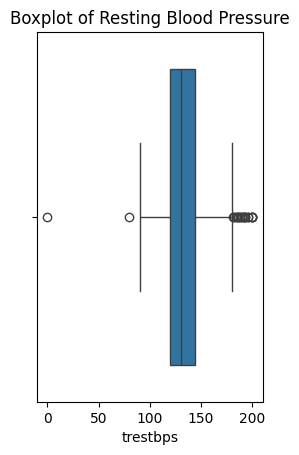

In [26]:
# Boxplot for 'trestbps'
plt.subplot(1, 2, 1)
sns.boxplot(x=df['trestbps'])
plt.title('Boxplot of Resting Blood Pressure')

Text(0.5, 1.0, 'Boxplot of Cholesterol')

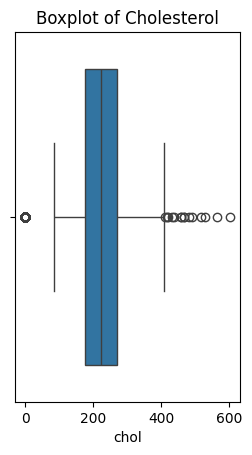

In [27]:
# Boxplot for 'chol'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['chol'])
plt.title('Boxplot of Cholesterol')

In [28]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [29]:
# Replace 0 values in 'trestbps' and 'chol' with the median of their respective columns
df['trestbps'] = df['trestbps'].replace(0, df['trestbps'].median())
df['chol'] = df['chol'].replace(0, df['chol'].median())

In [30]:
# Encoding categorical variables: 'sex', 'cp', 'restecg', 'exang', 'slope', 'thal'
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

# Check the encoded data
df_encoded.head()

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,41,135,203,False,132,0.0,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,57,140,192,False,148,0.4,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,52,118,186,False,190,0.0,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,57,110,201,False,126,1.5,0,True,False,False,False,True,False,True,False,False,True,False,False,False


In [31]:
# Features (X) and target (y)
X = df_encoded.drop('num', axis=1)  # drop target column
y = df_encoded['num']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.4945054945054945
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        89
           1       0.38      0.42      0.40        48
           2       0.29      0.18      0.22        22
           3       0.19      0.24      0.21        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.31      0.31      0.31       182
weighted avg       0.50      0.49      0.49       182

Confusion Matrix:
 [[62 17  5  3  2]
 [15 20  3  7  3]
 [ 4  6  4  6  2]
 [ 5  6  2  4  0]
 [ 2  3  0  1  0]]


In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid Search for optimal hyperparameters
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.5454794520547945


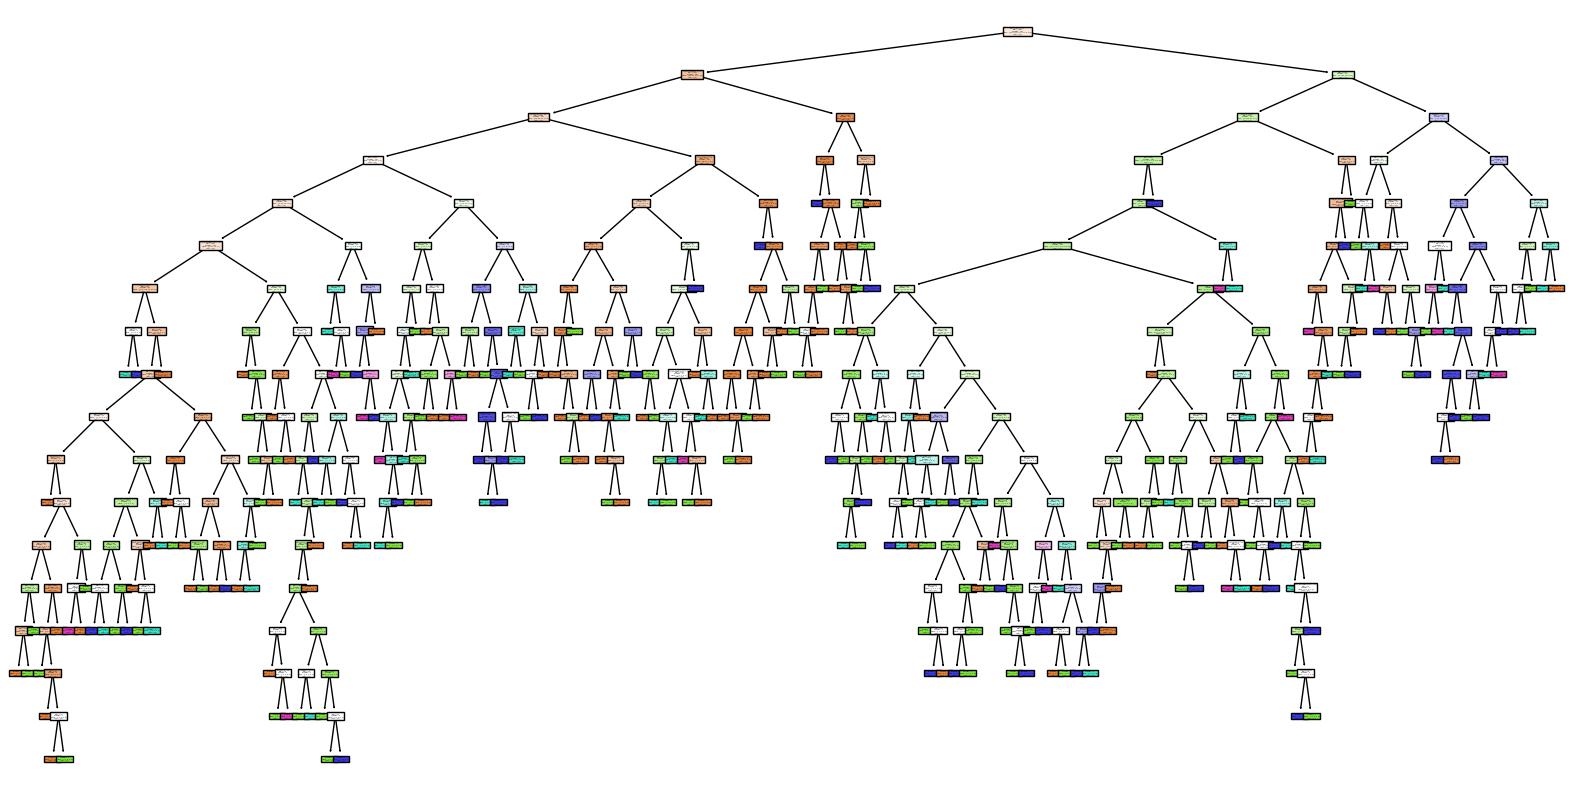

In [18]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=True, filled=True)
plt.show()
